Aim: For an image classification challenge create and train a ConvNet in python using Tensorflow. Also try
to improve the performance of the model by applying various hyperparameter tuning to reduce overfitting
or underfitting problem that might occur. Maintain graphs of comparisons.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
# Define the ConvNet architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [8]:
# Set up data augmentation
datagen = ImageDataGenerator(rotation_range=15,
 width_shift_range=0.1,
 height_shift_range=0.1,
 horizontal_flip=True)

In [10]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=264),
 epochs=2,
 validation_data=(x_test, y_test))

Epoch 1/2
190/190 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.6000 - loss: 1.1120 - val_accuracy: 0.6584 - val_loss: 0.9620
Epoch 2/2
190/190 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.6265 - loss: 1.0546 - val_accuracy: 0.6576 - val_loss: 0.9739


In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

313/313 - 10s - 33ms/step - accuracy: 0.6576 - loss: 0.9739
Test Loss: 0.9739
Test Accuracy: 0.6576


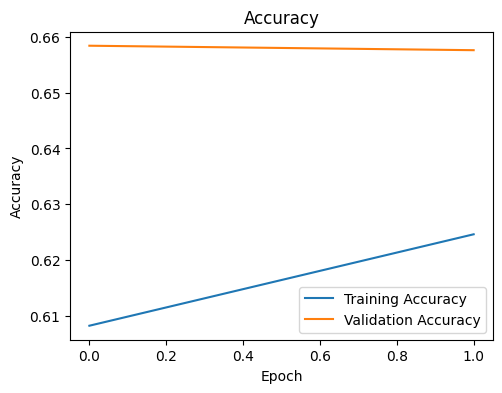

In [12]:
# Plot the accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

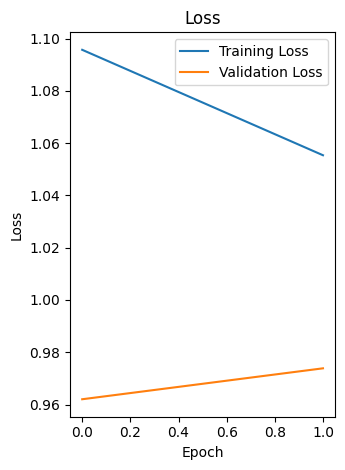

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()